# <b>Prostate Cancer</b>

The data for this project come from a study by Stamey et al. (1989). They examined the correlation between the level of prostate-specific antigen and a number of clinical measures in men who were about to receive a radical prostatectomy.

The variables are:
* log cancer volumn ($\textsf{lcavol}$),
* log prostate weight ($\textsf{lweight}$),
* $\textsf{age}$,
* log of the amount of benign prostatic prostatic hyperplasia ($\textsf{lbph}$),
* seminal vesicle invasion ($\textsf{svi}$),
* log of capsular penetration ($\textsf{lcp}$),
* Gleason score ($\textsf{gleason}$), and
* percent of Gleason score 4 or 5 ($\textsf{pgg45}$).

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('./data/prostate/prostate.data', delimiter='\t', index_col=0)
'''
    -'delimiter='\t': The file is tab-separated (not commas , but tabs \t separate the columns).
    -'index_col=0': Use the first column (column 0) as the index of the DataFrame (instead of making a default 0, 1, 2, ... index).
    
'delimiter' simply means what character separates the columns in our text file.
In normal .csv files (Comma-Separated Values), columns are separated by a comma ,.
But in some files, columns are separated by something else — for example, a tab (\t), a semicolon (;), a space ( ), etc.
The delimiter tells Pandas: "When you see this character, it means a new column starts."
'''
data.head(7) #(97, 10)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
6,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468,T
7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F


In [ ]:
print(data.isna().any())
'''
-data.isna() → Checks every value in our DataFrame (data) and returns True if a value is NaN (missing/empty), False otherwise.
.any() → Then, for each column, it checks: "Is there any True value (any missing data)?"
    -If yes → it shows True.
    -If no → it shows False.
''';

lcavol     False
lweight    False
age        False
lbph       False
svi        False
lcp        False
gleason    False
pgg45      False
dtype: bool


In [87]:
data.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [88]:
sum(data['train'] == 'T')

67

The correlation matrix of the predictors shows many strong correlations:

In [ ]:
# Important: '.corr()' by default uses Pearson correlation (the regular linear correlation).
data.drop('train', axis=1).corr() #it calculates the correlation coefficient between every pair of numeric columns in the DataFrame.


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


This table shows many strong correlations. For example, that both `lcavol` and `lcp` show a strong relationship with the response `lpsa`, and with each other. We need to fit the effects jointly to untangle the relationships between the predictors and the response.

Next is a scatterplot matrix showing every pairwise plot between the variables:

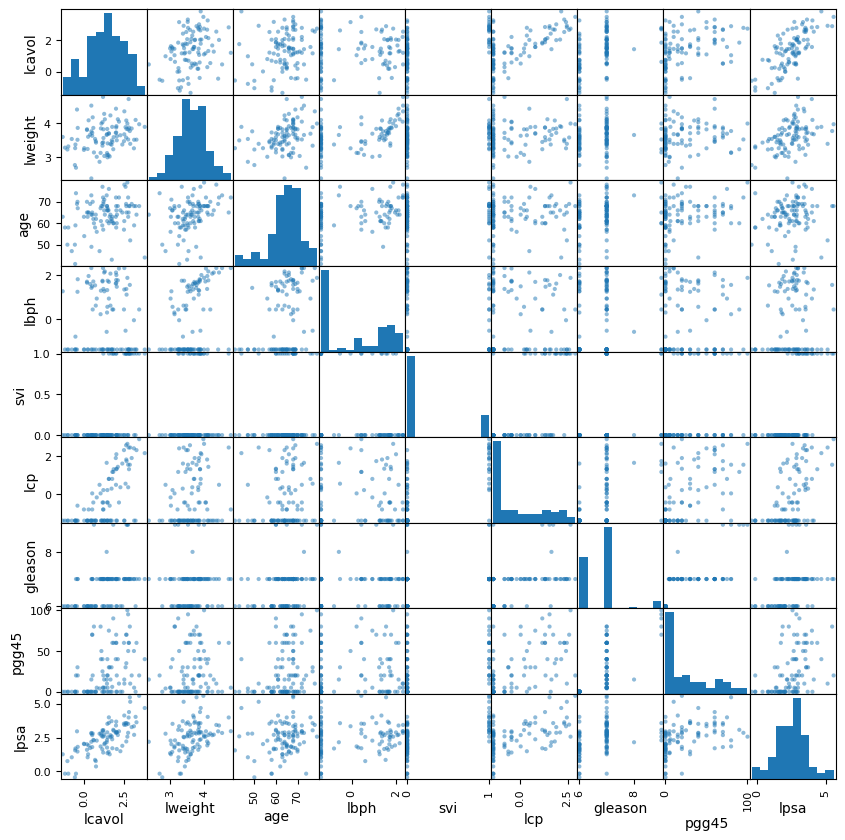

In [ ]:
"""Scatterplot matrix of the prostate cancer data"""
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

We see that `svi` is a binary variable, and `gleason` is an ordered categorical variable.
We also see, for example, that both `lcavol` and `lcp` show a strong relationship with the response `lpsa`, and with each other. We need to fit the effects jointly to untangle the relationships between the predictors and the response.

---

# <b>Additional Note</b>
### **Scatter Matrix and Heatmap Analysis**

**1. What the `scatter_matrix` Plot Shows**

- Running `pd.plotting.scatter_matrix(data, figsize=(10, 10))` followed by `plt.show()` creates a grid of scatter plots for all variable pairs in your dataset.
- **Scatter plots** (off-diagonal):  
  - Each plot shows the relationship between two variables (X: column variable, Y: row variable).
- **Histograms** (diagonal):  
  - Each diagonal cell displays the distribution of a single variable, helping you see if it's normal, skewed, etc.

**2. How to Read the Scatter Matrix**

- **Scatter plots:**
  - Points forming a straight line → strong linear relationship.
  - Points widely scattered → weak or no relationship.
  - Curved patterns → possible nonlinear relationship.
- **Histograms (diagonal):**
  - Show the distribution of each variable.
  - Peaks indicate where most values are concentrated.

**3. Important Conclusions from the Scatter Matrix**

| Variable 1 | Variable 2 | Comment                                                                 |
|------------|------------|-------------------------------------------------------------------------|
| lcavol     | lpsa       | Very strong positive correlation (≈ 0.73). Scatter points form a line.  |
| lcp        | lpsa       | Strong positive correlation (≈ 0.55).                                   |
| svi        | lpsa       | Positive relationship (≈ 0.57).                                         |
| gleason    | pgg45      | Very strong positive correlation (≈ 0.75). Related to cancer severity.  |
| lweight    | lpsa       | Moderate positive relationship (≈ 0.43).                                |
| age        | lpsa       | Very weak correlation (≈ 0.17).                                         |
| lbph       | Everything | Very weakly related to all variables.                                   |

**4. More Hidden Insights from the Scatter Matrix**

- Variables like `svi` and `lcp` are important predictors for `lpsa`.
- `lcavol` is one of the best predictors for `lpsa` due to its strong linear relationship.
- Variables like `lbph` and `age` have low correlation with `lpsa` and may be less useful for prediction.

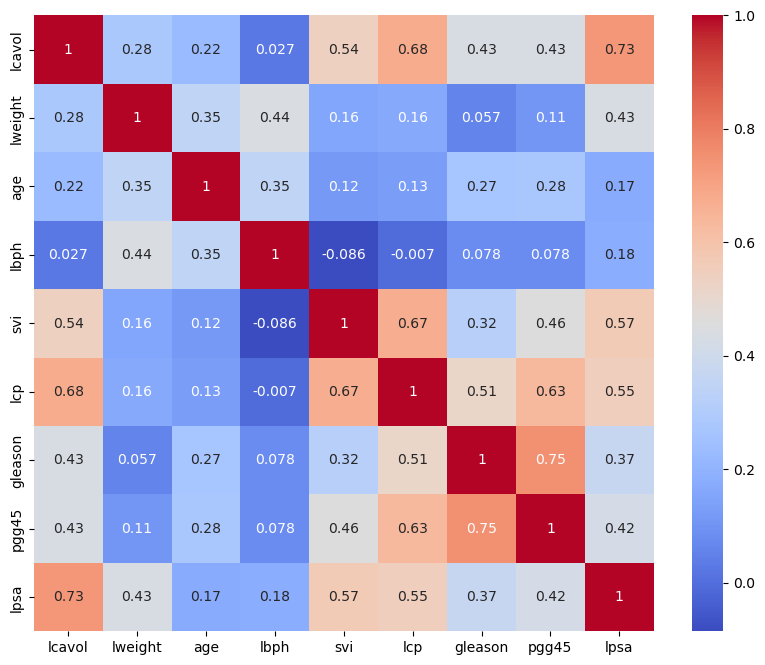

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(data.drop('train', axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()
'''
-our dataset has only positive or very weak negative correlations.
-No variables are strongly negatively related (no -0.9, -0.8, etc.).
-Dark blue here = "a little negative," not "strongly negative."
''';



- **Calculates the correlation matrix** for all numeric variables in your dataset (except the 'train' column) using `.corr()`.
- **Draws a heatmap** of these correlations using Seaborn, with:
  - `annot=True`: Shows the correlation coefficients inside each cell.
  - `cmap='coolwarm'`: Uses a color map where warm colors (red) indicate strong positive correlation and cool colors (blue) indicate negative correlation.
- **Figure size** is set to 10x8 for better readability.

**How to Interpret the Heatmap**

- **Each cell** shows the correlation between a pair of variables, ranging from -1 (perfect negative) to +1 (perfect positive).
- **Diagonal cells** are always 1, since a variable is perfectly correlated with itself.
- **Color meaning:**
  - **Red/Orange**: Strong positive correlation (variables increase together).
  - **Blue**: Negative correlation (one increases, the other decreases).
  - **White/Light colors**: Weak or no correlation.
- **In your dataset:**  
  - Most correlations are positive or only very weakly negative.
  - There are **no strong negative correlations** (no cells close to -1, such as -0.9 or -0.8).
  - **Dark blue** cells, if present, only indicate mild negative relationships, not strong ones.

**Key Takeaways**

- The heatmap provides a quick visual summary of how variables in your dataset are related.
- **No variables are strongly negatively related** in your data.
- Most relationships are either positive or very weakly negative, suggesting variables generally move together or independently, but not in opposition.

---

## <b>fitting a linear model</b>
Next We fit a linear model to `lpsa`, after first standardizing the predictors to have unit variance. We randomly split the dataset into a training set of size 67 and a test set of size 30. We applied least squares estimation to the training set, producing the estimates, standard errors and $Z$-scores shown below.

The $Z$-scores measure the effect of dropping that variable from the model. A $Z$-score greater than $2$ in absolute value is approximately significant at the $5$% level. For our example, we have $9$ parameters, and the critical value $t_{58, 0.025}$ of the $0.025$ tail quatiles of the $t_{67-9}$ distributions are $\pm 2.002$!

**$0.025$ Tail Quantile of $t_{58}$**

- The critical value $t_{58, 0.025}$ is the value on the t-distribution with $58$ degrees of freedom where the right tail area is $2.5$%.

- **Interpretation:**  
  This value is commonly used in two-tailed hypothesis tests, corresponding to a $95$% confidence interval, equivalently $5$% significance level $(\alpha = 0.05)$, with each tail covering $2.5$% of the probability mass.


Here’s the scientific distinction:

- **5% level** usually refers to the significance level $(\alpha = 0.05)$ - that is, how much probability you allow in the tails (error probability).

- **95% confidence interval** refers to the range in which you expect the true parameter to fall - you're $95$% confident the interval contains the true value.

When you do a two-sided test:

- You split the $5$% significance level into $2.5$% in each tail.
- So you look at the $0.025$ and $0.975$ quantiles of the distribution.

Thus:

- Saying **"a Z-score greater than $2$ in absolute value is significant at the $5$% level"** is correct when talking about hypothesis testing.
- Saying **"the $95$% confidence interval is $\text{estimate} \pm 2 \times \text{standard error}$ "** is correct when talking about parameter estimation.

---

# **Linear model fit to the prostate cancer data.**
### **Formal Specification of the OLS (Ordinary Least Squares) Model**

The OLS model assumes the data follows this form:
$$ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + \varepsilon_i, \quad i=1, \ldots, n$$

or in matrix notation:

$$\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

where:

- $\mathbf{y}$ is an $n \times 1$ vector of outcomes (dependent variable).
- $\mathbf{X}$ is an $n \times (p+1)$ matrix of predictors (including a column of ones for intercept); it is also called the design matrix.
- $\boldsymbol{\beta}$ is a $(p+1) \times 1$ vector of coefficients (parameters to estimate).
- $\boldsymbol{\varepsilon}$ is an $n \times 1$ vector of random errors.

### **Key Assumptions (Specifications) of OLS**

OLS requires some important assumptions:

**1. Linearity**  
The relationship between $\mathbf{y}$ and $\mathbf{X}$ is linear in parameters.

**2. Exogeneity** (Appendix 1)  
Exogeneity means the independent variables (predictors) are not correlated with the error terms. In other words, the errors have zero mean conditional on predictors:  
$$
E[\varepsilon_i \mid \mathbf{X}] = 0
$$
This says that, given $\mathbf{X}$, the expected value of the error term $\varepsilon_i$ is zero.
This implies that the errors have no systematic relationship with the predictors $\mathbf{X}$. In other words, the errors are unrelated to the predictors.
Simple meaning:
**The errors (what the model fails to predict) have nothing to do with the inputs.** The predictors contain no hidden information about the errors.  

**3. Homoscedasticity**    
Homoscedasticity means that the variance of the errors is **constant** across all levels of the predictors.
In math:
$$
\text{Var}(\varepsilon_i \mid \mathbf{X}) = \sigma^2
$$
Simple meaning:
The size of the errors stays the same — no matter if the input is small, medium, or large. (No heteroscedasticity.)

Heteroscedasticity is the opposite of homoscedasticity.
In math:
$$\text{Var}(\varepsilon_i \mid X) \quad \text{is not constant}$$
Simple meaning:
The size of the errors changes depending on the value of the inputs.
For example, as $X$ gets bigger, the model's errors might also get bigger.

**4. No Autocorrelation**    
Errors are uncorrelated across observations:  
$$
\text{Cov}(\varepsilon_i, \varepsilon_j \mid \mathbf{X}) = 0 \quad \text{for } i \neq j
$$

**5. Full Rank / No Multicollinearity**  
The predictor matrix $\mathbf{X}$ must have full rank - i.e., no predictor is a perfect linear combination of others.

**6. Normality of Errors (for inference only)**    
$$
\varepsilon_i \sim \mathcal{N}(0, \sigma^2)
$$ 
This is needed only for constructing confidence intervals and hypothesis testing (e.g., $Z$-scores, $p$-values), not for estimating $\boldsymbol{\beta}$.

**Application to our Case**

- The model is linear in standardized predictors (they have unit variance).
- You assume constant error variance and no correlation between errors.
- You have $67$ observations and $9$ predictors (including intercept).
- You fit $\boldsymbol{\beta}$ using the OLS estimator:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

- Then you calculate standard errors and $Z$-scores assuming approximate normality of the estimators (appendix 2).

**Summary in One Line:**

**OLS specification = Linear relationship + specific error assumptions (zero mean, constant variance, uncorrelated errors) + full-rank predictors.**

---

In [ ]:
"""Linear model fit to the prostate cancer data:

Roughly a Z-score larger than 2 in absolute value is significant nonzero at the p = 0.05 level.
We fit a linear model to the log of prostate-specific antigen, `lpsa`,
after first standardizing the predictors to have unit variance. We randomly
split the dataset into a training set of size 67 and a test set of size 30.
"""
'''
Starting context:
    -We are fitting a linear regression model to predict 'lpsa' (log prostate-specific antigen level) based on several predictors (e.g., age, volume, etc.).
    -Before fitting, all predictors were standardized (zero mean, unit variance).
    -We split into a training set (67 observations) and a test set (30 observations).
    -Now we're doing Ordinary Least Squares (OLS) regression on the training data (appendix 3).


'''
import numpy as np
import pandas as pd
import scipy.stats
import scipy.linalg
import math

#'data' is already loaded as a DataFrame containing the dataset.

# Split data into target ('lpsa') and predictors
data_y = data.pop('lpsa')  # Target variable (log of prostate-specific antigen)
##Explanation: The pop() method removes the column 'lpsa' from the DataFrame data and assigns it to the Series data_y. This is the target variable (y) we're trying to predict in the linear regression model.

mask_train = data.pop('train')  # Train-test split indicator
## Explanation: The pop() method also removes the 'train' column, which contains indicators (typically 'T' for training data and 'F' for testing data). This is stored in mask_train, which will be used to split the data into training and test sets.



# Standardize the predictors (zero mean, unit variance)
data_x_normalized = data.apply(scipy.stats.zscore)
## Explanation: This standardizes the predictor variables (the columns in DataFrame data other than 'lpsa' and 'train'). The 'apply(scipy.stats.zscore)' function standardizes each column by subtracting the mean and dividing by the standard deviation, it's called z-score stndardization. This results in variables with zero mean and unit variance.
"""
The formula:        z = (x - μ) / σ
is called Z-score normalization, or sometimes standardization.
Key points about Z-score normalization:
- x is your original data point.
- μ is the mean of the feature (column).
- σ is the standard deviation of the feature.
It rescales the data to have:
- Mean = 0
- Standard deviation = 1
Other names you might see for it:
- Z-score normalization
- Standardization
- Standard scaling
- Standard score transformation
"""


# Split the normalized data into training and test sets
data_x_train = data_x_normalized[mask_train == 'T'] #it's gonna select rows with 'train'== T.
data_y_train = data_y[mask_train == 'T']
data_x_test = data_x_normalized[mask_train == 'F']
data_y_test = data_y[mask_train == 'F']
"""
Explanation:
    -'data_x_train' and 'data_y_train': Select rows from 'data_x_normalized' and 'data_y' where 'mask_train == 'T'' (training data).
    -'data_x_test' and 'data_y_test': Select rows from 'data_x_normalized' and 'data_y' where 'mask_train == 'F'' (testing data).
These steps split your data into training and test sets based on the 'train' indicator.
"""


# Get the size of training set, test set, and number of predictors
size_train = sum(mask_train == 'T') #67     #The number of training samples (count of 'T' in mask_train).
size_test = sum(mask_train == 'F')  #30     #The number of test samples (count of 'F' in mask_train).    
size_predictor = len(data_x_train.columns) #8       #The number of predictors (columns) in the training set data_x_train. 
'''
"""
In the context of machine learning and statistics:

Predictors = Features = Independent variables  
These are the input variables used to predict the output (target).

So if you're modeling:

    y = β0 + β1 x1 + β2 x2 + ⋯ + βp xp + ε

Then:
- x1, x2, …, xp are your predictors (or features).
- y is the response (or target or dependent variable).
- Each xi is a column in your dataset.
- Each column represents a predictor (or feature).
- Each row represents one observation (one data point).
"""

'''
###### Predictors = Features = Independent variables. These are the input variables used to predict the output (target).#######
'''
data_x_train.columns
#output:
Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], dtype='object')

type(data_x_train.columns)
#output: 
pandas.core.indexes.base.Index
'''



# Add a column of ones to the training set for the intercept term
mat_x = np.hstack((np.ones((size_train, 1)), data_x_train.values)) #np.ones((size_train, 1)).shape #(67, 1) and data_x_train.values.shape    (67, 8)
'''
Explanation: The intercept term (β₀) in linear regression is modeled by adding a column of ones to the predictor matrix mat_x. This is done to include the bias term (intercept) in the model. np.hstack() horizontally stacks the ones column with the normalized predictors, forming the design matrix for training data.
mat_x.shape (67, 9)
'''

# Convert the target variable to a NumPy array for matrix operations
vec_y = data_y_train.values #data_y_train.values.shape (67,)
'''
type(data_y_train)  pandas.core.series.Series
type(data_y_train.values) numpy.ndarray
'''

r'''Compute the components needed for the OLS formula \hat{β} = (X^T X)^{-1} X^T y'''
mat_xt = np.transpose(mat_x)
mat_xx_inv = scipy.linalg.inv(mat_x.T @ mat_x)
'''
Explanation:
mat_xt: This is the transpose of the design matrix mat_x, needed for the OLS formula.
mat_xx_inv: The inverse of the matrix 'mat_x.T @ mat_x'. This term is part of the OLS formula used to compute the coefficients.
'''
r"""
The formula for the Ordinary Least Squares (OLS) estimator:

    \hat{β} = (X^T X)^{-1} X^T y

where:

- X is the design matrix of predictors, (67, 9)
- y is the vector of observed responses,(67,)
- \hat{β} is the vector of estimated coefficients. (9,)

This formula gives the coefficients that minimize the sum of squared residuals in linear regression.
"""


# Compute the OLS coefficients (beta)
ols_beta = mat_xx_inv @ mat_x.T @ vec_y  #(9,)
"""
Explanation: This is the core of the Ordinary Least Squares (OLS) estimation. The formula used is:

    β^ = (X^T X)^(-1) X^T y

Where:

- mat_xx_inv is the inverse of X^T X,
- mat_x.T is the transpose of mat_x,
- vec_y is the target variable (vector of observed values).

This line computes the estimated regression coefficients (ols_beta).
"""


# Compute the fitted values (predicted y values)
vec_y_fitted = mat_x @ ols_beta #(67,)
'''
Explanation: This calculates the predicted target variable values (vec_y_fitted) using the estimated coefficients 'ols_beta' and the design matrix 'mat_x'. It’s essentially the predicted y values based on your linear model.
'''

# Estimate the variance of the errors (sigma^2) (appendix 4) #This is indeed the (regression) residual variance (or the variance of the errors).
est_sigma2 = sum((vec_y - vec_y_fitted) ** 2) / (size_train - size_predictor - 1)
'''
Explanation: This estimates the variance of the residuals (errors) in the model. It’s calculated as the sum of squared residuals (the difference between observed y values vec_y and fitted values vec_y_fitted) divided by the degrees of freedom (size_train - size_predictor - 1).
'''

# Prepare the output table: terms (predictors + intercept), coefficients, and standard errors
table_term = ['Intercept'] + list(data_x_train.columns) #len(table_term) = 9 #['Intercept', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
table_coeff = ols_beta
table_stderr = [math.sqrt(mat_xx_inv[j, j] * est_sigma2)
                for j in range(size_predictor + 1)]
'''
Explanation:
    -table_term: A list of terms, including the intercept ('Intercept') and the predictor names from data_x_train.
    -table_coeff: The estimated regression coefficients (ols_beta).
    -table_stderr: The standard errors of the coefficients, 
    calculated as the square root of the diagonal elements of the variance-covariance matrix (appendix 5). The diagonal elements are scaled by est_sigma2.
'''
# Print the results in a nicely formatted table
print('{0:>15} {1:>15} {2:>15} {3:>15}'.format('Term', 'Coefficient', 'Std. Error', 'Z Score'))
print('-' * 64)
for term, coeff, stderr in zip(table_term, table_coeff, table_stderr):
    print('{0:>15} {1:>15f} {2:>15f} {3:>15f}'.format(term, coeff, stderr, coeff / stderr))

'''
Explanation:

The first print statement prints the column headers in a neatly formatted way: 'Term', 'Coefficient', 'Std. Error', and 'Z Score'.
The second print prints a line of hyphens for separation.
The for loop iterates over each term (predictor), coefficient, and standard error, and prints them in a formatted table. The Z-score is calculated as the coefficient divided by the standard error.
In this part:
'term', 'coeff', and 'stderr' are the individual elements from the three lists (generated by zip()).

'{0:>15} {1:>15f} {2:>15f} {3:>15f}' is the format string where:
    -{0:>15} formats the term (predictor or intercept).
    -{1:>15f} formats the coefficient to 15 characters wide and shows it as a float.
    -{2:>15f} formats the standard error similarly.
    -{3:>15f} formats the Z-score (which is the ratio of coeff / stderr).
'''
'''
What is zip()?
The zip() function in Python takes multiple iterables (like lists or arrays) and "zips" them together, creating an iterator that aggregates items from each iterable. In simple terms, it pairs up elements from each input iterable by their positions.
For example:
    table_term = ['Intercept', 'lcavol', 'lweight']
    table_coeff = [2.46493292, 0.67601634, 0.26169361]
    table_stderr = [0.0893149786377918, 0.12597460944635264, 0.09513400416170865]

zip(table_term, table_coeff, table_stderr) would produce:
    [('Intercept', 2.46493292, 0.0893149786377918),
    ('lcavol', 0.67601634, 0.12597460944635264),
    ('lweight', 0.26169361, 0.09513400416170865)]
'''


'''
Final Summary:
The code prepares the data, splits it into training and test sets, and then performs Ordinary Least Squares (OLS) regression to estimate the coefficients.

It also computes the standard errors of the coefficients and prints the results in a formatted table with terms (predictors), coefficients, standard errors, and Z-scores.
''';

           Term     Coefficient      Std. Error         Z Score
----------------------------------------------------------------
      Intercept        2.464933        0.089315       27.598203
         lcavol        0.676016        0.125975        5.366290
        lweight        0.261694        0.095134        2.750789
            age       -0.140734        0.100819       -1.395909
           lbph        0.209061        0.101691        2.055846
            svi        0.303623        0.122962        2.469255
            lcp       -0.287002        0.153731       -1.866913
        gleason       -0.021195        0.144497       -0.146681
          pgg45        0.265576        0.152820        1.737840


In [93]:
data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0
...,...,...,...,...,...,...,...,...
93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40
95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10
96,2.882564,3.773910,68,1.558145,1,1.558145,7,80


In [94]:
data_y

1    -0.430783
2    -0.162519
3    -0.162519
4    -0.162519
5     0.371564
        ...   
93    4.385147
94    4.684443
95    5.143124
96    5.477509
97    5.582932
Name: lpsa, Length: 97, dtype: float64

In [95]:
table_term

['Intercept',
 'lcavol',
 'lweight',
 'age',
 'lbph',
 'svi',
 'lcp',
 'gleason',
 'pgg45']

In [96]:
table_coeff

array([ 2.46493292,  0.67601634,  0.26169361, -0.14073374,  0.20906052,
        0.30362332, -0.28700184, -0.02119493,  0.26557614])

In [97]:
table_stderr

[0.0893149786377918,
 0.12597460944635264,
 0.09513400416170865,
 0.10081871100766304,
 0.10169076831215294,
 0.12296150079142704,
 0.15373073078561653,
 0.14449659244046067,
 0.1528196953677224]

In [98]:
list(zip(table_term, table_coeff, table_stderr))

[('Intercept', 2.464932922123745, 0.0893149786377918),
 ('lcavol', 0.6760163443892518, 0.12597460944635264),
 ('lweight', 0.2616936092638181, 0.09513400416170865),
 ('age', -0.14073374423100676, 0.10081871100766304),
 ('lbph', 0.20906052123209304, 0.10169076831215294),
 ('svi', 0.303623322498531, 0.12296150079142704),
 ('lcp', -0.2870018437521441, 0.15373073078561653),
 ('gleason', -0.02119493450617388, 0.14449659244046067),
 ('pgg45', 0.2655761365426029, 0.1528196953677224)]

In [99]:
table_term

['Intercept',
 'lcavol',
 'lweight',
 'age',
 'lbph',
 'svi',
 'lcp',
 'gleason',
 'pgg45']

In [100]:
vec_y_fitted.shape

(67,)

In [101]:
ols_beta.shape

(9,)

In [102]:
type(data_y_train.values)

numpy.ndarray

In [103]:
mat_x.shape

(67, 9)

The predictor `lcavol` shows the strongest effect, with `lweight` and `svi` also strong.

Notice that `lcp` is not significant, once `lcavol` is in the model (when used in a model without `lcavol`, `lcp` is strongly significant).

We can also test for the exclusion of a number of terms at once, using the $F$-statistic. For example, we consider dropping all the non-significant terms in the preceeding table (with $|z-score| < 2$), namely `age`,`lcp`, `gleason`, and `pgg45`. We get

$$
\frac{(32-81 - 29.43)/(9-5)}{29.43/(67-9)} = 1.67,
$$

which has a $p$-value of

$$
p-value = \text{Pr}(F_{4,58} \gt 1.67) = 0.17,
$$

and hence is not significant.

**we did an F-Test:**

We performed an F-test to check whether all the following predictors together are insignificant:

- `age`,`lcp`, `gleason`, and `pgg45`.

This is a joint hypothesis test:

- Null hypothesis (H₀): All $4$ coefficients are $0$.
- Alternative hypothesis (H₁): At least one of them is not $0$.

**The Result:**

got:

$F = 1.67$ with $p$-value = $0.17$

This means:

- If those variables truly had no effect, we'd observe an $F$-statistic of $1.67$ or larger $17$% of the time just by random chance.
- A $p$-value of $0.17$ is greater than the usual significance level (like $0.05$), so you fail to reject the null.
- → So, you don't have enough evidence to claim that these variables are jointly significant.

❌ About $2 * 0.17$:

- That’s not correct in the context of an $F$-test.
- The multiplication by $2$ is used for $Z$-tests or $t$-tests, because they are two-tailed tests.
- The $F$-test is inherently one-sided, since it deals with variance ratios - you don’t multiply the $p$-value by $2$.

✅ Final Interpretation:

- Since $p = 0.17 > 0.05$, those predictors (`age`,`lcp`, `gleason`, and `pgg45`) are not statistically significant when tested together.
- There's no need to compute 2 × 0.17.

---

In [133]:
"""F test for the exclusion of a number of terms at once

For example, we cansider dropping all the non-significant terms, namely
age, lcp, gleason, and pgg45."""







#Here is the F-test code for testing whether a group of predictors (features) can be dropped from a linear regression model:
#Goal: You want to test whether the predictors 'age', 'lcp', 'gleason', and 'pgg45' are jointly not significant, i.e., whether their coefficients can be assumed to be zero.
print("Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0")
'''
✅ Explanation:
You're testing the null hypothesis that the coefficients for 'age', 'lcp', 'gleason', and 'pgg45' are all zero — meaning they have no effect on the response variable.
'''

data_x_train_alt = data_x_train.drop(['age', 'lcp', 'gleason', 'pgg45'], axis=1)
'''
✅ Explanation:
This creates an alternative (reduced) dataset where those 4 columns are excluded.
This is your simpler model (restricted model) under the null hypothesis.
".drop()" vs. ".pop()":
✅ drop():
data_x_train_alt = data_x_train.drop(['age', 'lcp', 'gleason', 'pgg45'], axis=1)
    -Returns a new DataFrame (data_x_train_alt) with the specified columns removed.
    -Does NOT change the original 'data_x_train'.
    -Safe to reuse 'data_x_train' later.
⚠️ pop() (if used like this):
data_x_train_alt = data_x_train.copy()
data_x_train_alt.pop('age')
data_x_train_alt.pop('lcp')
data_x_train_alt.pop('gleason')
data_x_train_alt.pop('pgg45')
    -.pop(column) removes only one column at a time.
    -It modifies the DataFrame in-place (i.e., deletes the column permanently from 'data_x_train_alt').
    -If you called .pop() directly on 'data_x_train', it would permanently remove those columns from the original training data — which might break later code.
'''
size_predictor_alt = len(data_x_train_alt.columns) #4
'''
✅ Explanation:
Stores how many predictors remain in the reduced model.
data_x_train_alt.columns        #Index(['lcavol', 'lweight', 'lbph', 'svi'], dtype='object')
'''

# Use np.hstack and np.ones instead of scipy functions
mat_x_alt = np.hstack((np.ones((size_train, 1)), data_x_train_alt.values))  #(67, 5)
'''
✅ Explanation:
Adds a column of ones (for the intercept term) and combines it with the reduced predictor matrix.
    np.ones((size_train, 1)).shape  #(67, 1)
    data_x_train_alt.values.shape   #(67, 4)
'''
ols_beta_alt = np.linalg.solve(mat_x_alt.T @ mat_x_alt, mat_x_alt.T @ vec_y)
'''
✅ Explanation:
it computes the Ordinary Least Squares (OLS) regression coefficients, but in a more numerically stable way than using np.linalg.inv.
🔍 What it does:
You're solving this equation:       (A^T A) β = A^T y

Where:
    - A = mat_x_alt is your design matrix.
    - beta = ols_beta_alt is the vector of regression coefficients you're solving for.
    - np.linalg.solve() finds β directly by solving the linear system instead of computing the inverse.

❗ Why it's better than np.linalg.inv():
You could write:        ols_beta = np.linalg.inv(A.T @ A) @ A.T @ y  # Less stable

But matrix inversion (inv) is:
    - Slower
    - Prone to numerical inaccuracies (especially if A.T @ A is nearly singular or ill-conditioned)

Using:      np.linalg.solve(A.T @ A, A.T @ y)  # ✅ More stable
is preferred in real-world practice because it avoids explicitly inverting a matrix, which is both inefficient and risky for stability.
'''

vec_y_fitted_alt = mat_x_alt @ ols_beta_alt #(67,)
'''
✅ Explanation:
Computes the fitted values (predicted y) from the reduced model.
'''

rss0 = sum((vec_y - vec_y_fitted_alt) ** 2)
rss1 = sum((vec_y - vec_y_fitted) ** 2)
'''
✅ Explanation:
    -rss0: Residual sum of squares from the reduced model (null hypothesis).
    -rss1: RSS from the full model (with all predictors).
'''
F_stat = (rss0 - rss1) / (size_predictor - size_predictor_alt) * (size_train - size_predictor - 1) / rss1
'''
✅ Explanation:
Computes the F-statistic for testing if dropping those 4 predictors worsens the model significantly.
Formula:         F = ((RSS_reduced - RSS_full) / (p_full - p_reduced)) / (RSS_full / (n - p_full - 1))

Where:
    - p_full, p_reduced are the number of predictors in the full and reduced models, respectively.
    - n is the number of training samples.
'''

print('F = {}'.format(F_stat)) #or   print(f'F = {F_stat}')
print('Pr(F({dfn},{dfd}) > {fstat:.2f}) = {prob:.2f}'.format(
    dfn=size_predictor - size_predictor_alt,
    dfd=size_train - size_predictor - 1,
    fstat=F_stat,
    prob=1 - scipy.stats.f.cdf(F_stat,
                               dfn=size_predictor - size_predictor_alt,
                               dfd=size_train - size_predictor - 1),
))
'''
✅ Explanation:
    -dfn: Degrees of freedom numerator (number of variables being tested, here 4).
    -dfd: Degrees of freedom denominator (residual df from full model).
    -prob: The p-value, calculated from the F-distribution.
This tells you how likely it is to see an F-statistic this large if the null hypothesis is true.
This computes the p-value for the F-test.

- scipy.stats.f.cdf(F_stat, dfn, dfd)  
  computes the cumulative distribution function (CDF) of the F-distribution at the test statistic 'F_stat', given:
  - dfn: degrees of freedom numerator = number of predictors removed
  - dfd: degrees of freedom denominator = residual degrees of freedom in the full model

- 1 - ...  
  gives the area in the upper tail of the F-distribution - i.e., the p-value, which tells you the probability of observing such an F-statistic or more extreme if the null hypothesis is true.
so p-value = 1 - (cdf of the F-distribution)
''';

Null hypothesis: beta[3]=beta[6]=beta[7]=beta[8]=0
F = 1.6697548846375123
Pr(F(4,58) > 1.67) = 0.17


The mean prediction error on the test data is $0.521$. In contrast, prediction using the mean training value of `lpsa` has a test error of `1.057`, which is called the "base error rate".

In [114]:
"""Prediction error on the test data

We can see that the linear model reduces the base error rate by about 50%
"""


#We're using a linear regression model to predict the target variable (lpsa) from multiple features. Now that the model is trained, we're testing how well it performs on unseen test data.
mean_y_train = sum(vec_y) / size_train
'''
This computes the mean of the training targets (i.e., average 'lpsa' in training data).
It's used as a baseline prediction. If we had no model, we'd just guess the mean for all test examples.
'''

mat_x_test = np.hstack((np.ones((size_test, 1)), data_x_test.values))  # data_x_test.values for NumPy array
'''
Adds a column of ones to the test data matrix to account for the intercept term (β₀).
Converts 'data_x_test' into a NumPy array suitable for matrix multiplication with 'ols_beta'.

np.ones((size_test, 1)).shape   #(30, 1)
ols_beta.shape  #(9,)
'''
vec_y_test = data_y_test.values  # Convert the pandas Series to a NumPy array
vec_y_test_fitted = mat_x_test @ ols_beta
# ols_beta.shape  #(9,)

err_base = sum((vec_y_test - mean_y_train) ** 2) / size_test
err_ols = sum((vec_y_test - vec_y_test_fitted) ** 2) / size_test

print('Base error rate = {}'.format(err_base))
print('OLS error rate = {}'.format(err_ols))

Base error rate = 1.0567332280603818
OLS error rate = 0.5212740055076004


### <b>`Hence the linear model reduces the base error rate by about 50%.`</b>

In [ ]:
#the linear model with reduced predictors reduces the base error rate even more:
data_x_test_alt = data_x_test.drop(['age', 'lcp', 'gleason', 'pgg45'], axis=1)  #(30, 4)
mat_x_test_alt = np.hstack((np.ones((size_test, 1)), data_x_test_alt.values)) #(30, 5)
vec_y_test_fitted_alt = mat_x_test_alt @ ols_beta_alt
# ols_beta_alt.shape  #(5,)
#data_x_test.values.shape   #(30, 8)

err_base = sum((vec_y_test - mean_y_train) ** 2) / size_test
err_ols = sum((vec_y_test - vec_y_test_fitted_alt) ** 2) / size_test

print('Base error rate = {}'.format(err_base))
print('OLS error rate = {}'.format(err_ols))

Base error rate = 1.0567332280603818
OLS error rate = 0.4563321220401626


The OLS error rate on the test set might decrease (as it is our case) after omitting predictors with tiny (insignificant) $z$-scores.

Why?
- Tiny $z$-scores mean those predictors likely don't have a statistically significant contribution to explaining the variance in the target variable (their coefficients are probably not different from zero).

Including unnecessary predictors:
- Can cause overfitting on the training data.
- Makes the model more complex than needed.
- May introduce noise or multicollinearity.

By removing these non-significant predictors, your model becomes:
- Simpler
- More generalizable
- Less prone to overfitting → which often improves test set performance (i.e., lowers the OLS error rate on unseen data).

So, a lower OLS test error rate after dropping weak predictors is a positive outcome and a good sign of improved generalization.


But here’s why omitting predictors with low $Z$-scores doesn't always improve generalization:

✅ It can help when:
- The predictors truly have no relationship with the target variable.
- There’s multicollinearity (some predictors are redundant).
- The model is overfitting due to noise introduced by weak predictors.

❌ But it might not help (or can even hurt) when:
- The predictors have weak but real effects that only show up with more data.
- The training set is small, so $z$-scores may be misleading due to high variance.
- The relationships are nonlinear or interaction effects exist, which a simple linear model doesn’t capture.
- Some regularization or model selection strategy would have handled it better (like Ridge/Lasso).

Summary:
Removing predictors based on $z$-scores often helps, but it's not a universal rule. Always validate changes using test data or cross-validation to ensure your model really improved.

I will return to this project later to compare various selection and shrinkage methods.

---

# **Appendix 1**
To show that  
$$
E[\varepsilon_i \mid X] = 0
$$
implies  
$$
\operatorname{Cov}(\varepsilon_i, X) = 0,
$$
we will break it down step-by-step. The goal is to use the definition of covariance and conditional expectation to demonstrate that these two quantities are related.

Step-by-Step Explanation:

### **Covariance Definition**  
Covariance between two variables $\varepsilon_i$ and $X$ is defined as:

$$
\operatorname{Cov}(\varepsilon_i, X) = E[\varepsilon_i X] - E[\varepsilon_i] E[X]
$$

So, to compute the covariance, we need to compute the two terms $E[\varepsilon_i X]$ and $E[\varepsilon_i] E[X]$.

### **Using Conditional Expectation**  
By the law of total expectation, we can write:

$$
E[\varepsilon_i X] = E\big[ E[\varepsilon_i X \mid X] \big]
$$

Since  
$$
E[\varepsilon_i \mid X] = 0,
$$
we have:

$$
E[\varepsilon_i X \mid X] = X \cdot E[\varepsilon_i \mid X] = X \cdot 0 = 0
$$
The reason is that we are conditioning on $X$, and $X$ is treated as a known quantity when conditioning. So, when computing  
$$
E[\varepsilon_i X \mid X],
$$  
we treat $X$ as a fixed value, and we only need to take the expectation of $\varepsilon_i$ given $X$.

Therefore:

$$
E[\varepsilon_i X] = E[0] = 0
$$

### **Now Compute the Covariance**  
Substituting into the covariance formula:

$$
\operatorname{Cov}(\varepsilon_i, X) = E[\varepsilon_i X] - E[\varepsilon_i] E[X]
$$

Since $E[\varepsilon_i X] = 0$, we have:

$$
\operatorname{Cov}(\varepsilon_i, X) = 0 - E[\varepsilon_i] E[X]
$$

If the error term $\varepsilon_i$ has mean zero (i.e., $E[\varepsilon_i] = 0$), then:

$$
\operatorname{Cov}(\varepsilon_i, X) = 0 - 0 \cdot E[X] = 0
$$

### **Conclusion**

Thus, we've shown that:

$$
\operatorname{Cov}(\varepsilon_i, X) = 0
$$

---


# **Appendix 2**

The sentence:

**"Then you calculate standard errors and $Z$-scores assuming approximate normality of the estimators."**

means:

### **1. After fitting the model:**

Once you estimate $\hat{\beta}$ using the OLS formula:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y,
$$

we want to measure how reliable each estimated coefficient is - i.e., how much it would vary if we repeated the sampling and fitting process.

That's why we compute:

- the standard errors of $\hat{\beta}_j$,  
- and then $Z$-scores (or $t$-scores).


### **2. Why "assuming approximate normality"?**

In classical linear regression, if the errors $\varepsilon_i$ are normally distributed, then $\hat{\beta}$ is exactly normally distributed.

If the errors are not normal, but you have a large sample size (by the Central Limit Theorem), $\hat{\beta}$ is approximately normal anyway.

In your case, with $67$ data points and $9$ predictors, we assume approximate normality because:

- the sample size is "moderately large" (not tiny),  
- and because OLS estimators behave nicely (asymptotically normal) under mild conditions.

### **3. Meaning in practice:**

Because $\hat{\beta}$ is approximately normal, you can:

- compute standard errors (measuring spread/uncertainty),  
- compute $Z$-scores:

$$
Z_j = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)},
$$

and use standard normal or $t$-distribution tables to decide whether each predictor is statistically significant (e.g., is the $Z$-score big enough compared to $\pm 2$).

### **In very simple words:**

You estimate $\hat{\beta}$.  
You assume that $\hat{\beta}$ behaves roughly like a normal random variable.  
So, you can compute standard errors and $Z$-scores and trust that they follow a known distribution for making decisions.

### **We want to show:**

If the errors $\varepsilon_i$ are normally distributed, then the OLS estimator $\hat{\beta}$ is also normally distributed.


### **1. Set up the model**

The classical linear regression model is:

$$
y = X \beta + \varepsilon
$$

where:

- $y$ is an $n \times 1$ vector (the response),  
- $X$ is an $n \times (p+1)$ matrix (predictors, including intercept),  
- $\beta$ is a $(p+1) \times 1$ vector of coefficients,  
- $\varepsilon$ is an $n \times 1$ vector of errors.

We assume:

$$
\varepsilon \sim \mathcal{N}(0, \sigma^2 I_n),
$$

i.e., errors are independent, mean zero, constant variance $\sigma^2$, and normally distributed.


### **2. Expression for OLS Estimator**

The Ordinary Least Squares (OLS) estimator is:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top y
$$

Substituting the model $y = X \beta + \varepsilon$, we get:

$$
\hat{\beta} = (X^\top X)^{-1} X^\top (X \beta + \varepsilon)
$$

Expand:

$$
= (X^\top X)^{-1} (X^\top X \beta + X^\top \varepsilon) = \beta + (X^\top X)^{-1} X^\top \varepsilon
$$

### **3. Distribution of $\hat{\beta}$**

Now notice:

- $\beta$ is deterministic (fixed, not random).  
- $(X^\top X)^{-1} X^\top$ is deterministic (since $X$ is fixed).  
- $\varepsilon$ is random and normally distributed.

Thus, $\hat{\beta}$ is a linear transformation of a normal random vector $\varepsilon$.

💡 **Important:**  
Any linear function of a multivariate normal vector is itself multivariate normal.

Thus:

$$
\hat{\beta} \sim \mathcal{N} \left( \beta, \sigma^2 (X^\top X)^{-1} \right)
$$

✅ Therefore, $\hat{\beta}$ is exactly multivariate normal with:

- Mean: $\beta$  
- Covariance matrix: $\sigma^2 (X^\top X)^{-1}$


### **4. Summary of the Proof**

If 

$$
\varepsilon \sim \mathcal{N}(0, \sigma^2 I_n),
$$

then

$$
\hat{\beta} = \beta + (X^\top X)^{-1} X^\top \varepsilon
$$

is multivariate normal, because it is an affine (linear + constant) transformation of a normal vector.

---


# **Additional note**

### **Where do p-values, Z-scores, t-tests, and F-tests appear?**

| Concept  | Where Used                                                      | Purpose                                                      |
|----------|----------------------------------------------------------------|--------------------------------------------------------------|
| **p-value** | Hypothesis testing everywhere (regression, classification, experiments, etc.) | Measures evidence against a null hypothesis.                 |
| **Z-score** | When the sample size is large (or when variance is known). Used in OLS, logistic regression, etc. | Measures how many standard deviations an estimate is from 0 (or from a null value). |
| **t-test** | Small-sample situations (unknown variance). Used in OLS, time series, small experiments, etc. | Tests if a single coefficient (or mean difference) is significantly different from 0. |
| **F-test** | Comparing multiple coefficients together. Used in OLS, ANOVA, model selection, etc. | Tests if a group of variables together have no effect (e.g., all their coefficients are 0). |


### **Additional Notes on $t$-tests and Sample Size**

- There is **no strict minimum sample size** required for the $t$-test to be valid, other than having enough data to calculate the test statistic.  
- However, **small sample sizes lead to lower statistical power**, meaning a reduced ability to detect true differences.  
- For very small samples (e.g., $N \leq 5$), the $t$-test can still provide acceptable Type I error rates and power if the effect size is large, but caution is advised.  
- The **t-distribution** accounts for the extra uncertainty in small samples by having heavier tails than the normal distribution, which makes it appropriate for inference when variance is unknown and sample sizes are small.  
- As the sample size grows, the $t$-distribution approaches the normal distribution, making $Z#-scores appropriate for large samples or known variance cases.

### **Summary**

- **$p$-values** quantify evidence against null hypotheses across many statistical tests.  
- **$Z$-scores** are used when sample sizes are large or variance is known, measuring standardized deviations.  
- **$t$-tests** are preferred for small samples with unknown variance, testing single coefficients or mean differences.  
- **$F$-tests** evaluate the joint significance of multiple coefficients or groups of variables.

This framework guides the appropriate use of these statistics depending on sample size, variance knowledge, and the hypothesis tested.

---

# **Appendix 3**

### **Why do we do "OLS regression on the training data" after splitting?**

Because OLS regression is how we learn the relationship between predictors $X$ and target $y$.

Specifically:

- We have training data: (features $X_{\text{train}}$, output $y_{\text{train}}$).  
- We want to find the best-fit line (or hyperplane) that predicts $y$ from $X$.  
- OLS chooses $\hat{\beta}$ (the coefficient estimates) that minimize the sum of squared errors between the predicted and actual $y$'s.

Mathematically, it solves:

$$
\hat{\beta} = \arg \min_{\beta} \sum_{i=1}^n (y_i - x_i^\top \beta)^2
$$


### **In context of our problem:**

- We standardized predictors → to make learning easier (but not necessary).  
- We split into training and test → so that you can train on one part and evaluate on unseen data (test set).  
- We apply OLS on training data → to find the best $\hat{\beta}$.  

Without this last step, we wouldn't have any model.  
OLS training step is how we learn the model.


### **Why training data?**  
Because if we trained on the test set too, we'd "cheat" - we'd already know the answers when evaluating.  
We want honest evaluation of generalization ability → so we train only on training data.


## **In short:**

| Step                   | Why                                    |
|------------------------|----------------------------------------|
| Standardize predictors | Put features on same scale              |
| Split into train/test  | To have honest model evaluation         |
| Do OLS on training set | To learn the model (find $\hat{\beta}$) |



When you hear someone say:

**"We fit a linear regression model"**

it usually means:

**"We applied Ordinary Least Squares (OLS) to find the best coefficients."**

More precisely:  
Linear regression is the model form:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \varepsilon
$$

OLS is the method we most commonly use to fit (estimate) the coefficients $\beta$'s, by minimizing the sum of squared residuals.


### **Important subtlety:**  
In basic (classical) linear regression, fitting = applying OLS.

In more advanced cases (e.g., when errors aren't normal, when data are heteroscedastic, when using regularization like Ridge/Lasso), the "fitting" procedure might change a bit. But OLS is the default and most fundamental.


### **One-sentence summary:**  
` Fitting a linear regression model generally means applying OLS to find the best coefficients that predict ` $y$ `from` $X$.

---


# <b>Additional Note</b>

### **Why do we compute standard errors, $p$-values, $Z$-scores, hypothesis tests?**

When you fit a model (like OLS), you are working with just one sample out of infinitely many possible samples.

The coefficients you estimated ($\hat{\beta}$) depend on that particular sample. ➔ If you resampled, you would get slightly different coefficients!

- **Standard errors** measure how much the estimate would vary across different random samples.  
- **Z-scores and t-scores** standardize the coefficients (coefficient divided by standard error) to make them comparable.  
- **p-values** tell you how surprising your estimate would be if the true coefficient were actually $0$.  
- **Hypothesis testing** (null hypothesis $\beta_j = 0$) is the formal way to decide if a predictor is likely to be "really" associated with the outcome.

### **In short:**

- **Standard error** → "How much would this coefficient change if I had a different sample?"  
- **$Z$-score / $t$-score** → "How big is the coefficient relative to its typical random fluctuation?"  
- **$p$-value** → "Is this coefficient large enough that it is unlikely to be due to chance?"  
- **Hypothesis test** → "Should I believe that this predictor is related to the response?"

### **Conclusion:**  
We do these calculations because we only observed one sample, and we want to measure how reliable and stable our estimated coefficients are.

---


# <b>Additional Note</b>

###  **1. Standardizing predictors (input variables)**

✅ If you standardize your predictors (e.g., $X$), you transform them to have:

- Mean = $0$  
- Variance = $1$ (unit variance)

This is helpful because:

- All predictors are on the same scale.  
- It makes coefficients more comparable in size.  
- It sometimes improves numerical stability for optimization.

**Example:**  
Instead of age (30–70) and income (30k–200k) having different scales, you standardize them.


### **2. Calculating $Z$-scores or $t$-scores for coefficients**

When you compute $Z$-scores/$t$-scores for estimated coefficients $\hat{\beta}_j$:

- You **don't standardize predictors at this point**.  
- You are testing the null hypothesis:  
  $$
  H_0: \beta_j = 0
  $$
- You just divide the estimated coefficient $\hat{\beta}_j$ by its standard error:  
  $$
  Z \text{ or } t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}
  $$
- This tells you how many standard errors away your estimated $\hat{\beta}_j$ is from $0$.

You do **not** need predictors to be standardized for hypothesis testing.


### **Summary:**

| Question                                         | Answer                                                                                   |
|-------------------------------------------------|------------------------------------------------------------------------------------------|
| Should we standardize predictors before modeling? | Optional, but often useful (especially for interpretability, ridge/lasso regression, etc.) |
| Should we standardize before computing $z$-scores for coefficients? | No. $Z$-scores/$t$-scores naturally assume null mean $0$; you just divide by standard error.    |


### **Important:**

- Standardizing predictors and calculating $z$-scores are two **independent steps**.  
- Standardizing predictors **does not affect** whether or not you can calculate $z$-scores.  
- But if you standardize, the coefficients' interpretation changes - they represent effect per $1$ standard deviation change in $X$.

---


# <b>Appendix 4</b>

### **Why do we calculate the variance of the residuals (errors)?**

We calculate this to estimate the variance of the errors (or the "error variance" $\sigma^2$) in the model. This is important for a few reasons:

- **Standard errors of the coefficients:**  
  The variance of the errors is a critical component in calculating the standard errors of the estimated regression coefficients ($\hat{\beta}$). The standard errors give us a measure of the uncertainty of the estimates of the coefficients. These are then used to calculate $t$-statistics and $p$-values to assess the significance of the predictors.

- **Model fit and confidence intervals:**  
  The residual variance helps us understand how well the model fits the data. If the variance is large, it means the model is not fitting the data well, and there is a lot of unexplained variability. If the variance is small, the model fits the data closely.

- **Prediction intervals:**  
  Once you estimate the error variance, you can use it to construct prediction intervals for future observations. The error variance helps to quantify the uncertainty in the predictions.

Breakdown of the formula:

- **Sum of squared residuals:**  
  $$
  \sum (y_i - \hat{y}_i)^2
  $$ 
  is the sum of squared differences between the observed values ($y_i$) and the fitted values ($\hat{y}_i$). This is a measure of the overall deviation of the model from the actual data points.

- **Degrees of freedom:**  
  $$
  df = n - p - 1
  $$ 
  where:  
  - $n$ is the number of observations (data points),  
  - $p$ is the number of predictors (variables).  
  
  You subtract $1$ because you are estimating $p + 1$ parameters (the intercept and coefficients), and the formula accounts for this by adjusting the degrees of freedom.

By dividing the sum of squared residuals by the degrees of freedom, we get the mean squared error (MSE), which is an estimate of the variance of the error term.

**In short:**  
We calculate the residual variance to quantify the uncertainty in the model’s predictions, to calculate the standard errors for the coefficients, and to make predictions with associated confidence intervals.

---

# <b>Appendix 5</b>

### **Variance-Covariance Matrix in OLS Regression**

The variance-covariance matrix is a square matrix that contains the variances of each parameter (regression coefficient) on the diagonal and the covariances between different pairs of parameters off the diagonal.

In the context of Ordinary Least Squares (OLS) regression, the variance-covariance matrix of the estimated coefficients $\hat{\beta}$ is often denoted as $\mathrm{Var}(\hat{\beta})$. It provides important information about the uncertainty in the estimated coefficients, including how much the coefficients might vary across different samples (different training sets).


### **Key points about the variance-covariance matrix in OLS:**

- **Diagonal elements:**  
  The diagonal elements of the matrix give the variance of each coefficient $\hat{\beta}_i$. The variance tells you how much $\hat{\beta}_i$ might vary across different samples of the data.

- **Off-diagonal elements:**  
  The off-diagonal elements provide the covariance between pairs of coefficients. The covariance measures the relationship between two coefficients: if the covariance is large, it suggests that the two coefficients tend to change together (positively or negatively).
  
  Formula:

  The variance-covariance matrix for OLS can be estimated as:

  $$
  \mathrm{Var}(\hat{\beta}) = \sigma^2 (X^\top X)^{-1}
  $$

  Where:
  
  - This matrix, $\mathrm{Var}(\hat{\beta})$, gives us the variances and covariances of the estimated coefficients. The diagonal elements give the squared standard errors used to compute $z$-scores and confidence intervals.
  - $\hat{\beta}$ is the vector of estimated regression coefficients.
  - $\sigma^2$ is the true variance of the error terms (which is usually unknown).
  - In practice, we estimate $\sigma^2$ with the residual variance $\hat{\sigma}^2$, referred to as `est_sigma2` in our code.
  - $X$ is the design matrix (the matrix of predictors with an added column of ones for the intercept),
  - $X^\top X$ is the normal equation matrix used in OLS estimation.  
  - The matrix $(X^\top X)^{-1}$ is called the inverse of the information matrix, and it captures how the predictors are related to each other (e.g., multicollinearity).


### **In our code:**

- The matrix `mat_xx_inv` is the inverse of $X^\top X$, and it captures the variability of the coefficients.
- To calculate the standard error of each coefficient, you take the square root of the diagonal elements of the variance-covariance matrix and multiply them by the estimated error variance $\hat{\sigma}^2$.  
- This gives you the standard error of each coefficient, which is used to construct confidence intervals and conduct hypothesis tests.


### **Summary**

The variance-covariance matrix provides an estimate of how much each coefficient could vary and how the coefficients are related to each other. By calculating the standard error from this matrix, you gain insights into the reliability and precision of each regression coefficient.

---


# <b>Additional Note</b>

Both $Z$-score and $p$-value ultimately tell us the same thing: `whether a predictor is statistically significant`. But here's why both are used and when each is helpful:

### **1. $Z$-score:**
- The $Z$-score gives a *standardized measure* of how far the estimated coefficient is from zero in terms of standard errors.
- It shows how strong the signal is.
- It's useful when you're doing manual checks or just want a quick idea of significance.
- However, it requires interpretation - you need to know that e.g., $|Z| > 1.96$ implies ~$95$% confidence.
- (When you say you're $95$% confident, it means:

    **“If the true coefficient were actually zero (null hypothesis), then observing a result as extreme as mine (or more extreme) would happen less than $5$% of the time. Since I *did* observe such a result, I have evidence against the null — so I’m $95$% confident the true coefficient is not zero so the associated predictor is statistically significant.”)**

### **2. P-value:**
- The $p$-value is the probability of observing a test statistic as extreme as the $Z$-score, assuming the null hypothesis (that the coefficient is $0$) is true.
- It's directly interpretable: if $p < 0.05$, we reject the null at $95$% confidence.
- It’s what most statistical software reports by default.
- It allows more fine-grained decisions (e.g., comparing $p = 0.049$ vs $0.051$).

### **Why both?**
- $Z$-score is the raw test statistic - useful for understanding how far your estimate is from the null.
- $P$-value translates that distance into probability - easier to compare to significance thresholds like $0.05$ or $0.01$.

They are mathematically linked:

    p-value = 2 * P(Z > |z|)  (for two-tailed tests)
This is the formula to compute the $p$-value from a $Z$-score in a two-tailed hypothesis test.

What it means:

- $Z$ is your test statistic - the $Z$-score you calculated.
- $|z|$ means we’re taking the absolute value because we care about both directions (positive or negative deviations).
- $P(Z > |z|)$ is the probability of observing a $Z$ value greater than your result, in the upper tail of the standard normal distribution.
- Since it’s two-tailed, we double that probability to account for both extremes (positive and negative tails).

`also note that:`
- `That’s not correct in the context of an F-test.`
- `The multiplication by 2 is used for Z-tests or t-tests, because they are two-tailed tests.`
- `The F-test is inherently one-sided, since it deals with variance ratios - you don’t multiply the p-value by 2.`

Example:

- Let’s say your $Z$-score is $2.5$.
- Look up $P(Z > 2.5)$ in the standard normal table ⇒ about $0.0062$.
- Multiply by $2$ ⇒

    $p-value = 2 * 0.0062 = 0.0124$

Interpretation:

- If $p = 0.0124$, then the coefficient is statistically significant at the 5% level (because $0.0124 < 0.05$).

So in short:  
    - $Z$-score tells you "how unusual" the coefficient is under the null.  
    - $P$-value tells you "how confident" you can be in rejecting the null.

